<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB
   Unnamed: 0  message_id                                               text  \
0           0       33214  any software just for 15 $ - 99 $ understandin...   
1           1       11929  perspective on ferc regulatory action client c...   
2           2       19784  wanted to try ci 4 lis but thought it was way ...   
3           3        2209  enron / hpl actuals for december 11 , 2000 tec...   
4           4       15880  looking for che

C:\Users\Saad\AppData\Local\Temp\ipykernel_7352\2141047018.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label_text', palette='viridis')


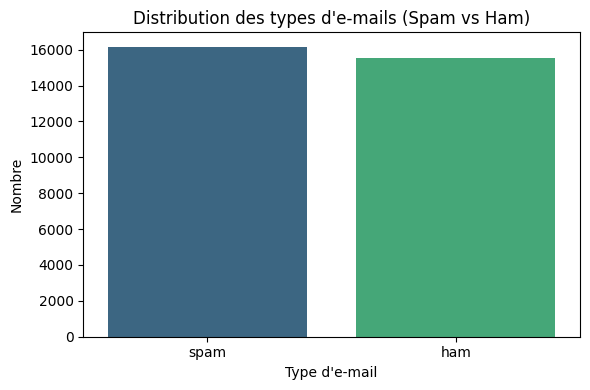

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("DataSet_Emails.csv" , encoding='latin-1')

# Aperçu des données
print(df.head(), df.info(), df.describe())

# Valeurs manquantes
print(df.isnull().sum())

# Doublons
df = df.drop_duplicates()

# Distribution des classes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label_text', palette='viridis')
plt.title("Distribution des types d'e-mails (Spam vs Ham)")
plt.xlabel("Type d'e-mail")
plt.ylabel("Nombre")
plt.tight_layout()
plt.show()


In [7]:
!pip install nltk


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import nltk

nltk.download('punkt', quiet=False)
nltk.download('stopwords', quiet=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
print(nltk.data.path)

['C:\\Users\\Saad/nltk_data', 'c:\\Users\\Saad\\Desktop\\Diabetes\\myenv\\nltk_data', 'c:\\Users\\Saad\\Desktop\\Diabetes\\myenv\\share\\nltk_data', 'c:\\Users\\Saad\\Desktop\\Diabetes\\myenv\\lib\\nltk_data', 'C:\\Users\\Saad\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=False)
nltk.download('stopwords', quiet=False)
nltk.download('punkt_tab', quiet=False)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df = df.dropna(subset=['text'])
df['clean_text'] = df['text'].apply(preprocess_text)
df = df.dropna(subset=['label_text'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
!pip install wordcloud


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


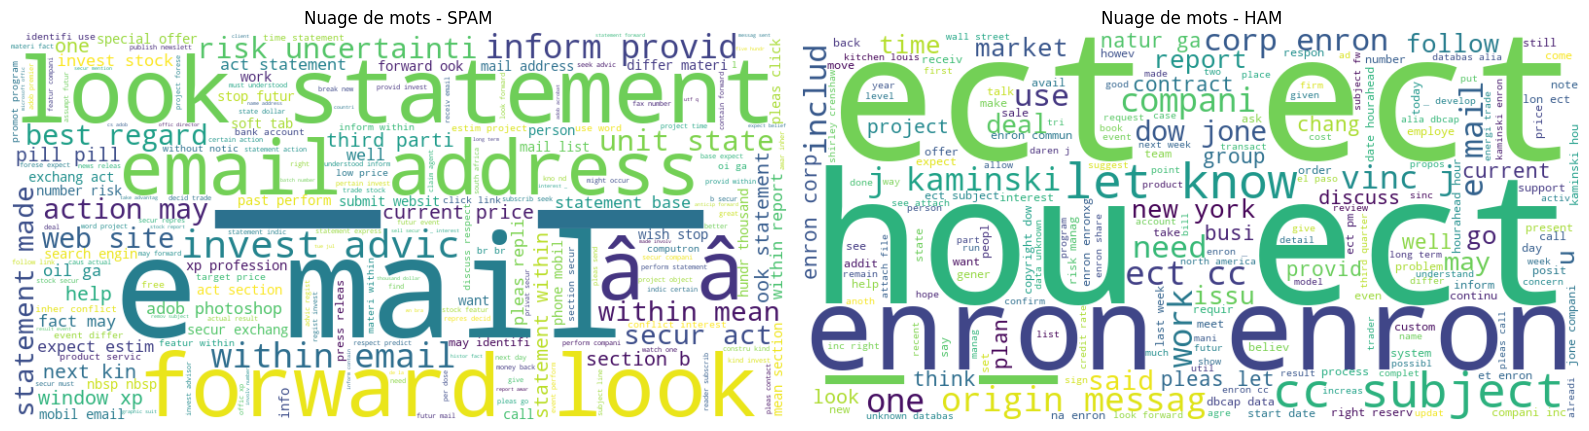

In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrer les e-mails spam et ham
spam_words = ' '.join(df[df.label_text == 'spam']['clean_text'])
ham_words = ' '.join(df[df.label_text == 'ham']['clean_text'])
# Créer les WordClouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(16, 8))

# Nuage de mots pour les spams
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots - SPAM')
plt.axis('off')

# Nuage de mots pour les hams
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots - HAM')
plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
print(df['label_text'].value_counts())

label_text
spam    16112
ham     15553
Name: count, dtype: int64


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": LinearSVC()
}


# Évaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


--- Naive Bayes ---
[[3066   45]
 [  51 3171]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3111
           1       0.99      0.98      0.99      3222

    accuracy                           0.98      6333
   macro avg       0.98      0.98      0.98      6333
weighted avg       0.98      0.98      0.98      6333

--- Decision Tree ---
[[3007  104]
 [ 113 3109]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3111
           1       0.97      0.96      0.97      3222

    accuracy                           0.97      6333
   macro avg       0.97      0.97      0.97      6333
weighted avg       0.97      0.97      0.97      6333

--- SVM ---
[[3064   47]
 [  10 3212]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3111
           1       0.99      1.00      0.99      3222

    accuracy                           0.99    

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Instancier les modèles
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

nb = MultinomialNB()
dt = DecisionTreeClassifier()
svm = LinearSVC()

# Preprocessing (if not already run)
df = df.dropna(subset=['text'])
# ... your preprocess_text function and df['clean_text'] creation ...
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Validation croisée pour chaque modèle
print("Naive Bayes CV:", cross_val_score(nb, X, y, cv=5).mean())
print("Decision Tree CV:", cross_val_score(dt, X, y, cv=5).mean())
print("SVM CV:", cross_val_score(svm, X, y, cv=5).mean())

Naive Bayes CV: 0.9859466287699352
Decision Tree CV: 0.9626085583451761
SVM CV: 0.9911258487288805
